In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import urbanpy as up
import contextily as cx
import seaborn as sns
import shapely
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.validation import make_valid
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
data = pd.read_csv('inputs/oferta_alimentaria_14_06_2022.csv')

In [4]:
data.head()

start                            end  \
0  2022-06-03T16:04:58.479-05:00  2022-06-03T16:05:21.340-05:00   
1  2022-06-03T16:05:21.401-05:00  2022-06-03T16:06:04.744-05:00   
2  2022-06-03T16:06:04.779-05:00  2022-06-03T16:06:46.793-05:00   
3  2022-06-03T16:06:46.827-05:00  2022-06-03T16:09:53.547-05:00   
4  2022-06-03T16:17:17.814-05:00  2022-06-03T16:19:15.298-05:00   

               Nombre Tipo de oferta alimentaria Tipo de localización  \
0     Pacha en Brasas               Restaurantes                Punto   
1    El búnker yuyero               Restaurantes                Punto   
2      Frosty & Fruit                       Otro                Punto   
3  Mercado San Martín                  Mercados                 Línea   
4                  SN                    Bodegas                Punto   

              Registra la ubicación del punto  \
0   -12.22878 -76.860667 69.06332969665527 35   
1  -12.228747 -76.860691 69.06782531738281 35   
2  -12.228581 -76.860859 68.72584438323975 35   
3                                         NaN   
4  -12.228145 -76.861302 67.66339492797852 37   

   _Registra la ubicación del punto_latitude  \
0                                 -12.228780   
1                                 -12.228747   
2                                 -12.228581   
3                                        NaN   
4                                 -12.228145   

   _Registra la ubicación del punto_longitude  \
0                                  -76.860667   
1                                  -76.860691   
2                                  -76.860859   
3                                         NaN   
4                                  -76.861302   

   _Registra la ubicación del punto_altitude  \
0                                  69.063330   
1                                  69.067825   
2                                  68.725844   
3                                        NaN   
4                                  67.663395   

   _Registra la ubicación del punto_precision  ... Registra el área del lugar  \
0                                        35.0  ...                        NaN   
1                                        35.0  ...                        NaN   
2                                        35.0  ...                        NaN   
3                                         NaN  ...                        NaN   
4                                        37.0  ...                        NaN   

         _id                                 _uuid     _submission_time  \
0  160973644  1bd41368-16df-4d23-9da6-d49ac0fbaef5  2022-06-03T21:05:28   
1  160973686  c47c9a34-53d1-4083-a812-e87b2232c5ec  2022-06-03T21:06:16   
2  160973779  8c94f5b3-5c7a-49c7-8b1d-a11f9755f5cd  2022-06-03T21:06:57   
3  160974812  cfd6cf3e-8a37-45fb-9ab9-43ff68c4b4ce  2022-06-03T21:17:32   
4  160977278  a3f66da4-524f-4437-bedf-d1691d0b756b  2022-06-03T21:54:51   

  _validation_status  _notes            _status _submitted_by _tags  _index  
0                NaN     NaN  submitted_via_web     cortega27   NaN       1  
1                NaN     NaN  submitted_via_web     cortega27   NaN       2  
2                NaN     NaN  submitted_via_web     cortega27   NaN       3  
3                NaN     NaN  submitted_via_web     cortega27   NaN       4  
4                NaN     NaN  submitted_via_web     cortega27   NaN       5  

[5 rows x 21 columns]

In [5]:
data.columns

Index(['start', 'end', 'Nombre', 'Tipo de oferta alimentaria',
       'Tipo de localización', 'Registra la ubicación del punto',
       '_Registra la ubicación del punto_latitude',
       '_Registra la ubicación del punto_longitude',
       '_Registra la ubicación del punto_altitude',
       '_Registra la ubicación del punto_precision',
       'Registra las coordenadas del lugar', 'Registra el área del lugar',
       '_id', '_uuid', '_submission_time', '_validation_status', '_notes',
       '_status', '_submitted_by', '_tags', '_index'],
      dtype='object')

In [6]:
puntos = data[data["Tipo de localización"] == 'Punto']

In [7]:
puntos_gdf = gpd.GeoDataFrame(puntos, crs='EPSG:4326',
                              geometry=gpd.points_from_xy(puntos['_Registra la ubicación del punto_longitude'],
                                                          puntos['_Registra la ubicación del punto_latitude']))

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [8]:
zona_carabayllo = gpd.read_file('inputs/zona_carabayllo.geojson', crs=4326)
zona_pachacamac = gpd.read_file('inputs/zona_pachacamac.geojson', crs=4326)

In [12]:
zona_carabayllo.geometry = zona_carabayllo.geometry.apply(make_valid)
zona_pachacamac.geometry = zona_pachacamac.geometry.apply(make_valid)

In [13]:
zona_carabayllo = gpd.GeoSeries(zona_carabayllo.geometry.unary_union, crs=4326)
zona_pachacamac = gpd.GeoSeries(zona_pachacamac.geometry.unary_union, crs=4326)

In [14]:
puntos_gdf.intersects(zona_carabayllo.geometry.unary_union).sum()

131

In [15]:
puntos_gdf.intersects(zona_pachacamac.geometry.unary_union).sum()

64

In [19]:
puntos_gdf.intersects(zona_carabayllo.geometry.unary_union).sum() + \
puntos_gdf.intersects(zona_pachacamac.geometry.unary_union).sum()

195

In [20]:
data.shape

(215, 21)

In [81]:
pachacamac_markets = pd.DataFrame.from_dict({
    0: {'name': 'Mercado Municipal', 'lat': -12.22898, 'lon': -76.86035},
    1: {'name': 'Mercado Ocoña', 'lat': -12.22691, 'lon': -76.85909},
    2: {'name': 'Bioferia Casablanca', 'lat': -12.203319, 'lon': -76.8640086}
}, orient='index')

pachacamac_markets = gpd.GeoDataFrame(
    pachacamac_markets,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(pachacamac_markets['lon'], pachacamac_markets['lat'])
)

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


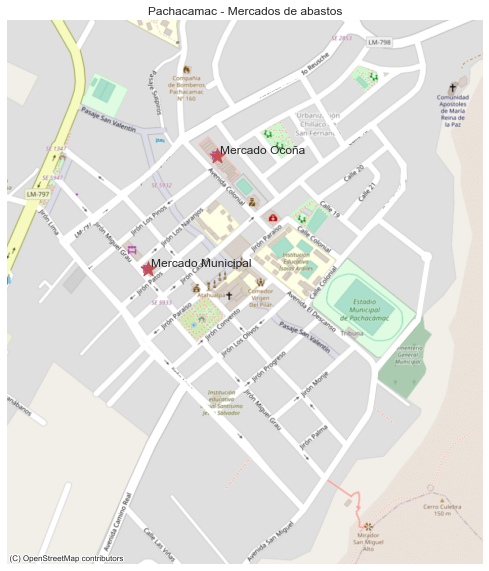

In [23]:
## Final Pachacamac figure
pad = 0.001

ax = pachacamac_markets.plot(color='r', marker='*', markersize=250, figsize=(10, 10))
ax.set_title(f"Pachacamac - Mercados de abastos")

zona_pachacamac.plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = zona_pachacamac.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

cx.add_basemap(ax, crs='EPSG:4326',
               source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('outputs/producto_1/maps/zona_pachacamac_mercados_idrc.png', dpi=300, bbox_inches='tight')

In [24]:
carabayllo_markets = gpd.GeoDataFrame(
    pd.DataFrame([['Qatuna', -11.89040, -77.04176],
                  ['Mercado Modelo Tungasuca', -11.89292, -77.04387],
                  ['Bioferia Tungasuca', -11.89664, -77.04062],
                  ['Nueva Imagen', -11.89694, -77.03814],
                  ['Multiservicios Tungasuca', -11.89457, -77.04273]],
                 columns=['name', 'lat', 'lon'])
)
carabayllo_markets['geometry'] = gpd.points_from_xy(carabayllo_markets['lon'], carabayllo_markets['lat'])

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [25]:
mcdo_informal = gpd.read_file('inputs/mercado_informal_universitaria_carabayllo.geojson')

In [26]:
puntos_gdf['Tipo de oferta alimentaria'].value_counts()

Bodegas                       99
Restaurantes                  57
Otro                          19
Mini-mercados                 18
Panaderias                    10
Ambulantes                     7
Mercados                       3
Mercados en áreas públicas     1
Name: Tipo de oferta alimentaria, dtype: int64

In [27]:
carabayllo = gpd.read_file('inputs/carabayllo/')

In [28]:
pachacamac = gpd.read_file('inputs/pachacamac/')

In [29]:
carabayllo_puntos = puntos_gdf.intersects(zona_carabayllo.geometry.unary_union.buffer(0.001))
pachacamac_puntos = puntos_gdf.intersects(zona_pachacamac.geometry.unary_union.buffer(0.001))

In [30]:
puntos_gdf.loc[carabayllo_puntos, 'Distrito'] = 'Carabayllo'
puntos_gdf.loc[pachacamac_puntos, 'Distrito'] = 'Pachacamac'

In [31]:
puntos_gdf.columns

Index(['start', 'end', 'Nombre', 'Tipo de oferta alimentaria',
       'Tipo de localización', 'Registra la ubicación del punto',
       '_Registra la ubicación del punto_latitude',
       '_Registra la ubicación del punto_longitude',
       '_Registra la ubicación del punto_altitude',
       '_Registra la ubicación del punto_precision',
       'Registra las coordenadas del lugar', 'Registra el área del lugar',
       '_id', '_uuid', '_submission_time', '_validation_status', '_notes',
       '_status', '_submitted_by', '_tags', '_index', 'geometry', 'Distrito'],
      dtype='object')

In [32]:
puntos_gdf['Distrito'].value_counts()

Carabayllo    148
Pachacamac     66
Name: Distrito, dtype: int64

In [33]:
puntos_gdf['Nombre'] = puntos_gdf['Nombre'].replace({'X': 'SN'})

In [34]:
puntos_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 214 entries, 0 to 214
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   start                                       214 non-null    object  
 1   end                                         214 non-null    object  
 2   Nombre                                      214 non-null    object  
 3   Tipo de oferta alimentaria                  214 non-null    object  
 4   Tipo de localización                        214 non-null    object  
 5   Registra la ubicación del punto             214 non-null    object  
 6   _Registra la ubicación del punto_latitude   214 non-null    float64 
 7   _Registra la ubicación del punto_longitude  214 non-null    float64 
 8   _Registra la ubicación del punto_altitude   214 non-null    float64 
 9   _Registra la ubicación del punto_precision  214 non-null    float64 

In [35]:
(puntos_gdf['Nombre'] == 'SN').value_counts()

False    160
True      54
Name: Nombre, dtype: int64

In [36]:
puntos_gdf['FLAG_Nombre'] = puntos_gdf['Nombre'] == 'SN'

In [37]:
(puntos_gdf.groupby('Distrito')['FLAG_Nombre']
     .value_counts()
     .to_frame()
     .to_csv('outputs/producto_1/tables/nombre_frecuencias.csv'))

In [38]:
(puntos_gdf.groupby('Distrito')['Tipo de localización']
     .value_counts()
     .to_frame()
     .to_csv('outputs/producto_1/tables/tipo_localizacion_frecuencias.csv'))

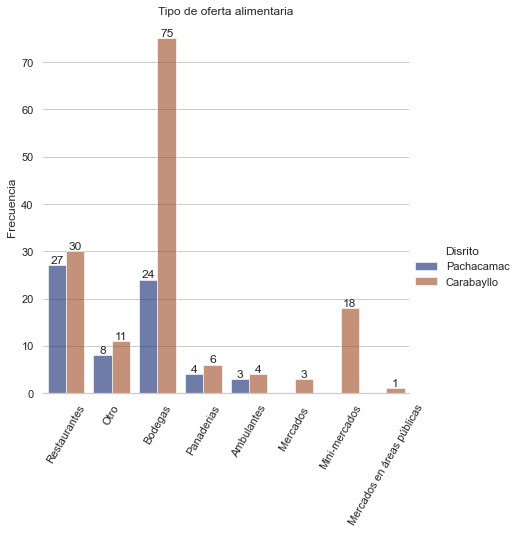

In [39]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=puntos_gdf, kind="count",
    x="Tipo de oferta alimentaria", hue="Distrito",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Frecuencia")
g.set_xticklabels(rotation=60)
g.legend.set_title("Disrito")
plt.title("Tipo de oferta alimentaria")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.savefig('outputs/producto_1/figures/frecuencias_tipo_oferta_barras.png', 
            dpi=300, bbox_inches='tight')

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/3832195564.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


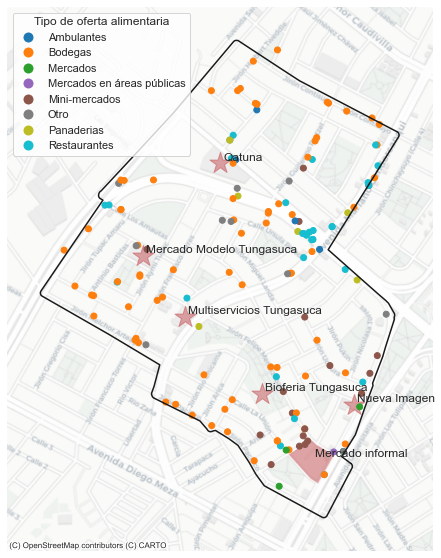

In [40]:
ax = gpd.GeoSeries((zona_carabayllo.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

carabayllo_markets.plot(color='r', marker='*', markersize=500, alpha=0.5, ax=ax)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(color='r', alpha=0.5, ax=ax)
mcdo_informal_point = mcdo_informal.centroid
ax.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

puntos_gdf.plot('Tipo de oferta alimentaria', legend=True, legend_kwds={'loc': 'best'}, ax=ax)
leg = ax.get_legend()
leg.set_title('Tipo de oferta alimentaria')

minx, miny, maxx, maxy = zona_carabayllo.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.savefig('outputs/producto_1/maps/tipo_oferta_carabayllo.png', 
            dpi=300, bbox_inches='tight')

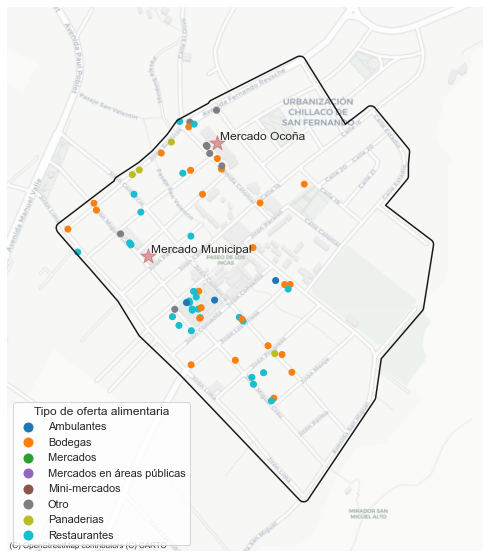

In [41]:
ax = gpd.GeoSeries((zona_pachacamac.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

pachacamac_markets.plot(color='r', marker='*', markersize=250, alpha=0.5, ax=ax)
for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

puntos_gdf.plot('Tipo de oferta alimentaria', legend=True, legend_kwds={'loc': 'lower left'}, ax=ax)
leg = ax.get_legend()
leg.set_title('Tipo de oferta alimentaria')

minx, miny, maxx, maxy = zona_pachacamac.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.savefig('outputs/producto_1/maps/tipo_oferta_pachacamac.png', 
            dpi=300, bbox_inches='tight')

In [42]:
zona_carabayllo_inicial = gpd.read_file('inputs/zona_carabayllo_inicial.geojson', crs=4326)
zona_pachacamac_inicial = gpd.read_file('inputs/zona_pachacamac_inicial.geojson', crs=4326)

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/2256255767.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


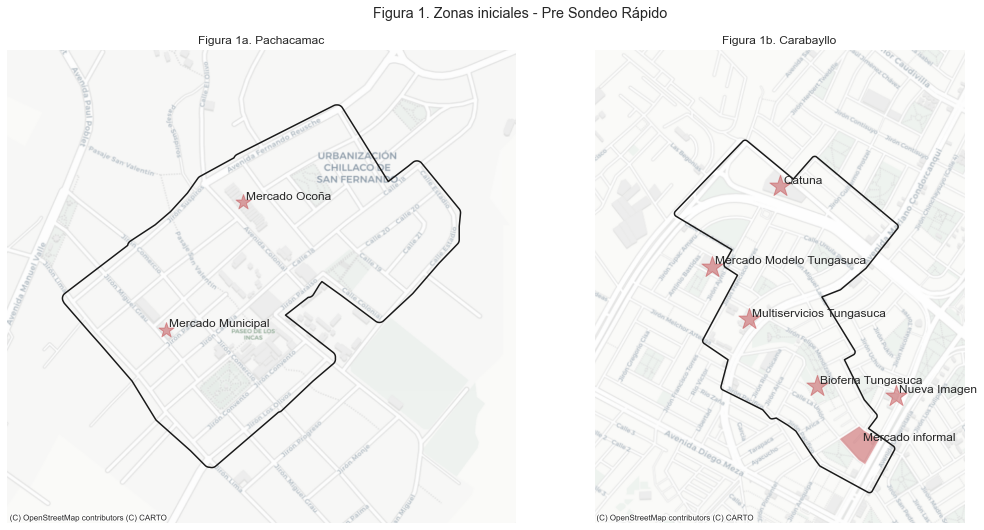

In [43]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,7.5))

fig.suptitle("Figura 1. Zonas iniciales - Pre Sondeo Rápido")

ax.set_title("Figura 1a. Pachacamac")

gpd.GeoSeries((zona_pachacamac_inicial.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', ax=ax)

pachacamac_markets.plot(color='r', marker='*', markersize=250, alpha=0.5, ax=ax)
for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_pachacamac_inicial.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

ax1.set_title("Figura 1b. Carabayllo")

gpd.GeoSeries((zona_carabayllo_inicial.geometry
               .unary_union
               .buffer(0.0001) # Smooth borders
               .exterior)).plot(facecolor='none', color='k', ax=ax1)

carabayllo_markets.plot(color='r', marker='*', markersize=500, alpha=0.5, ax=ax1)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(color='r', alpha=0.5, ax=ax1)
mcdo_informal_point = mcdo_informal.centroid
ax1.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_carabayllo.total_bounds
margins = 0.001
ax1.set_xlim(minx-margins, maxx+margins)
ax1.set_ylim(miny-margins, maxy+margins)

ax1.set_axis_off()
cx.add_basemap(ax=ax1, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/zonas_iniciales.png', dpi=300, bbox_inches='tight')

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/1436432579.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


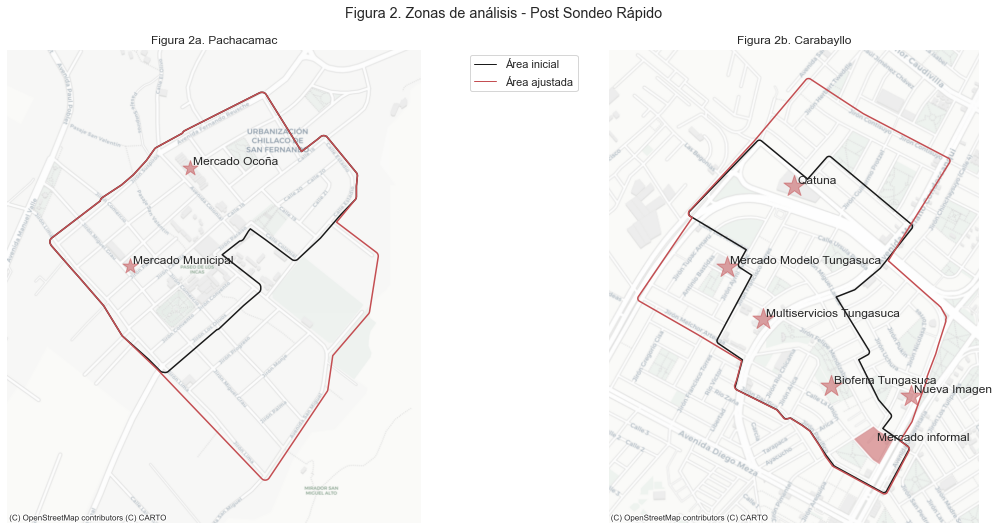

In [45]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,7.5))

fig.suptitle("Figura 2. Zonas de análisis - Post Sondeo Rápido")

ax.set_title("Figura 2a. Pachacamac")

gpd.GeoSeries((zona_pachacamac_inicial.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', marker='--', ax=ax)

gpd.GeoSeries((zona_pachacamac.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='r', ax=ax)

pachacamac_markets.plot(color='r', marker='*', markersize=250, alpha=0.5, ax=ax)
for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_pachacamac.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

ax1.set_title("Figura 2b. Carabayllo")

gpd.GeoSeries((zona_carabayllo_inicial.geometry
               .unary_union
               .buffer(0.0001) # Smooth borders
               .exterior)).plot(facecolor='none', color='k', marker='--', ax=ax1)

gpd.GeoSeries((zona_carabayllo.geometry
               .unary_union
               .buffer(0.0001) # Smooth borders
               .exterior)).plot(facecolor='none', color='r', ax=ax1)

carabayllo_markets.plot(color='r', marker='*', markersize=500, alpha=0.5, ax=ax1)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax1.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(color='r', alpha=0.5, ax=ax1)
mcdo_informal_point = mcdo_informal.centroid
ax1.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_carabayllo.total_bounds
margins = 0.001
ax1.set_xlim(minx-margins, maxx+margins)
ax1.set_ylim(miny-margins, maxy+margins)

ax1.set_axis_off()
cx.add_basemap(ax=ax1, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

legend_elements = [Line2D([0], [0], color='k', lw=1, label='Área inicial'),
                   Line2D([0], [0], color='r', lw=1, label='Área ajustada')]

ax1.legend(handles=legend_elements, bbox_to_anchor=(-0.07, 1))

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/zonas_finales.png', dpi=300, bbox_inches='tight')

area
----

0.0021496 km2

2149.6 m2

In [46]:
puntos_gdf.shape

(214, 24)

In [47]:
puntos_heatmap = puntos_gdf[puntos_gdf['Tipo de oferta alimentaria'] != 'Restaurantes']

In [48]:
carabayllo_hexs = up.geom.gen_hexagons(10, gpd.GeoDataFrame(geometry=zona_carabayllo.buffer(0.001)))
carabayllo_hexs_counts = up.geom.merge_shape_hex(carabayllo_hexs, puntos_heatmap[puntos_heatmap['Distrito'] == 'Carabayllo'], agg={'Distrito':'count' })

pachacamac_hexs = up.geom.gen_hexagons(10, gpd.GeoDataFrame(geometry=zona_pachacamac.buffer(0.001)))
pachacamac_hexs_counts = up.geom.merge_shape_hex(pachacamac_hexs, puntos_heatmap[puntos_heatmap['Distrito'] == 'Pachacamac'], agg={'Distrito':'count' })

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/793379304.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  carabayllo_hexs = up.geom.gen_hexagons(10, gpd.GeoDataFrame(geometry=zona_carabayllo.buffer(0.001)))
/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/793379304.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pachacamac_hexs = up.geom.gen_hexagons(10, gpd.GeoDataFrame(geometry=zona_pachacamac.buffer(0.001)))


In [49]:
carabayllo_hexs_counts['Distrito'] = carabayllo_hexs_counts['Distrito'].fillna(0)
pachacamac_hexs_counts['Distrito'] = pachacamac_hexs_counts['Distrito'].fillna(0)

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/1578229407.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


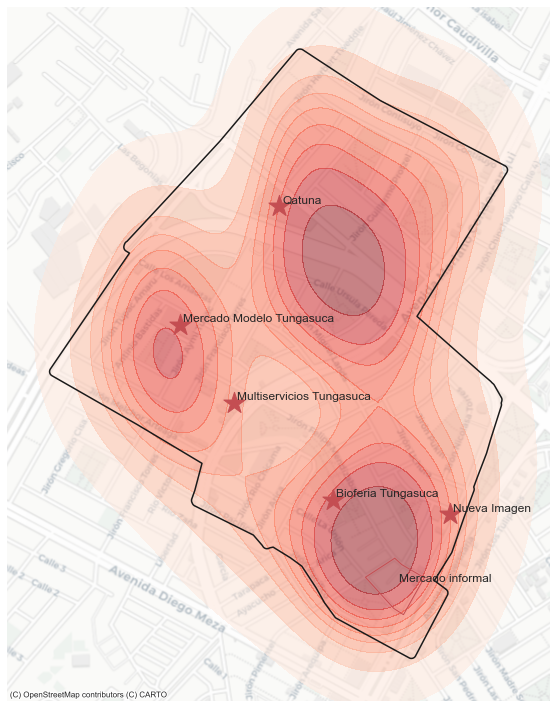

In [52]:
ax = gpd.GeoSeries((zona_carabayllo.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

gplt.kdeplot(
    puntos_heatmap.query("Distrito == 'Carabayllo'"), cmap='Reds', ax=ax, alpha=0.5,
    shade=True, fill=False, thresh=0.05, # cbar=True, cbar_ax=cax,
)

carabayllo_markets.plot(color='r', marker='*', markersize=500, ax=ax)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(facecolor='none', edgecolor='r', ax=ax)
mcdo_informal_point = mcdo_informal.centroid
ax.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_carabayllo.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/tipo_oferta_heatmap_carabayllo.png', 
            dpi=300, bbox_inches='tight')

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_14549/363991251.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


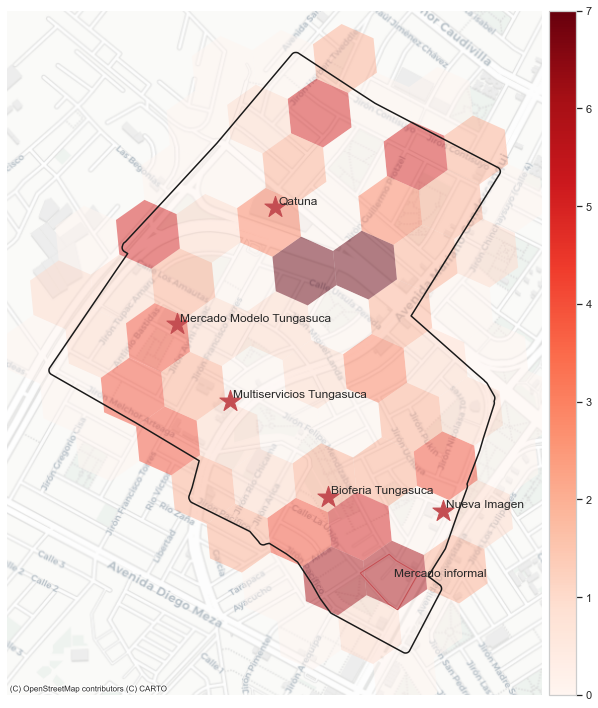

In [53]:
ax = gpd.GeoSeries((zona_carabayllo.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

carabayllo_hexs_counts.plot('Distrito', legend=True, linewidth=0, cmap='Reds', alpha=0.5, ax=ax, cax=cax)

carabayllo_markets.plot(color='r', marker='*', markersize=500, ax=ax)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(facecolor='none', edgecolor='r', ax=ax)
mcdo_informal_point = mcdo_informal.centroid
ax.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_carabayllo.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/tipo_oferta_hexmap_carabayllo.png', 
            dpi=300, bbox_inches='tight')

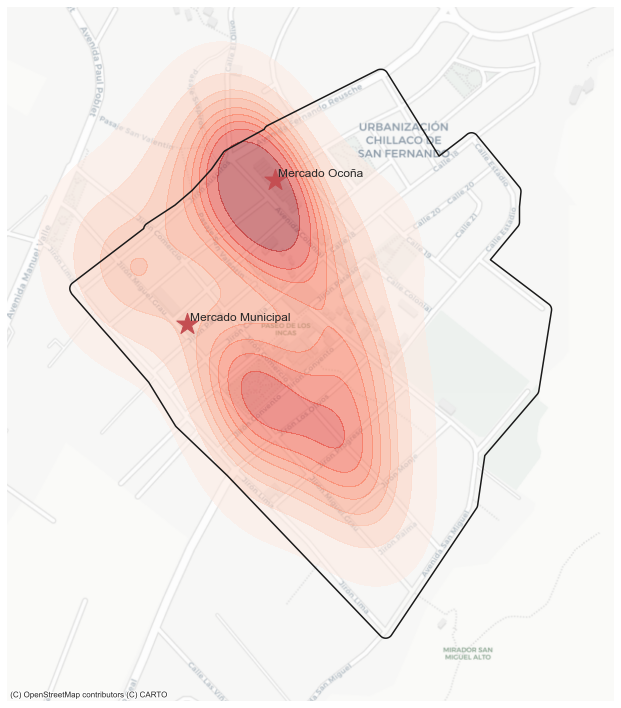

In [54]:
ax = gpd.GeoSeries((zona_pachacamac.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

gplt.kdeplot(
    puntos_heatmap.query("Distrito == 'Pachacamac'"), cmap='Reds', ax=ax, alpha=0.5,
    shade=True, fill=False, thresh=0.05, # cbar=True, cbar_ax=cax,
)

pachacamac_markets.plot(color='r', marker='*', markersize=500, ax=ax)

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_pachacamac.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/tipo_oferta_heatmap_pachacamac.png', 
            dpi=300, bbox_inches='tight')

In [56]:
urba_pachacamac = gpd.read_file('/Users/claudio/Desktop/zona_residencial_pachacamac.shp')

In [61]:
urba_pachacamac.iloc[0]

id                                                          0
geometry    POLYGON ((-76.86541719251524 -12.2008477203002...
Name: 0, dtype: object

In [70]:
type(urba_pachacamac)

geopandas.geodataframe.GeoDataFrame

In [72]:
type(zona_pachacamac)

geopandas.geoseries.GeoSeries

<AxesSubplot:>

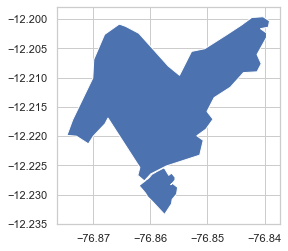

In [74]:
zona_pachacamac.append(urba_pachacamac['geometry']).plot()

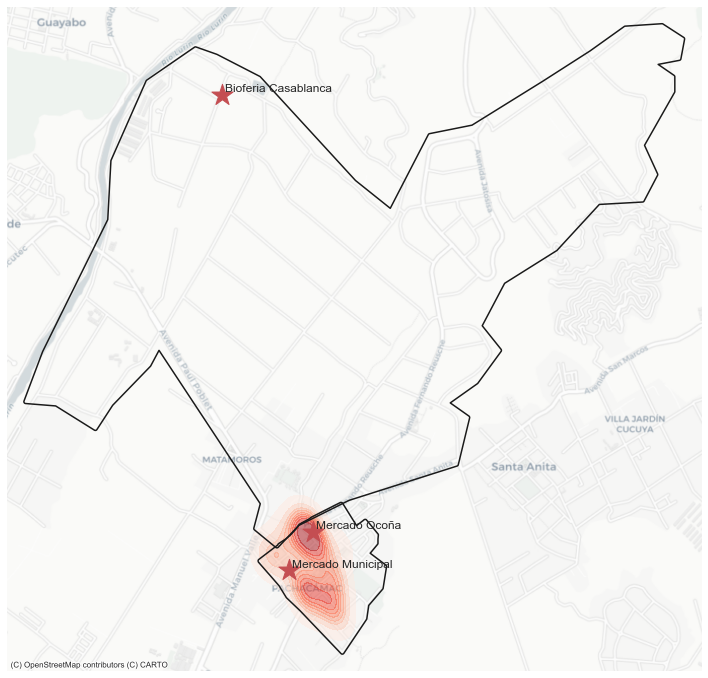

In [82]:
ax = gpd.GeoSeries((zona_pachacamac.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

gplt.kdeplot(
    puntos_heatmap.query("Distrito == 'Pachacamac'"), cmap='Reds', ax=ax, alpha=0.5,
    shade=True, fill=False, thresh=0.05, # cbar=True, cbar_ax=cax,
)

pachacamac_markets.plot(color='r', marker='*', markersize=500, ax=ax)

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

    
gpd.GeoSeries((urba_pachacamac.geometry
               .unary_union
               .buffer(0.0001) # Smooth borders
               .exterior)).plot(facecolor='none', color='k', ax=ax)

minx, miny, maxx, maxy = zona_pachacamac.append(urba_pachacamac['geometry']).total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/tipo_oferta_heatmap_pachacamac_con_urbanizacion.png', 
            dpi=300, bbox_inches='tight')

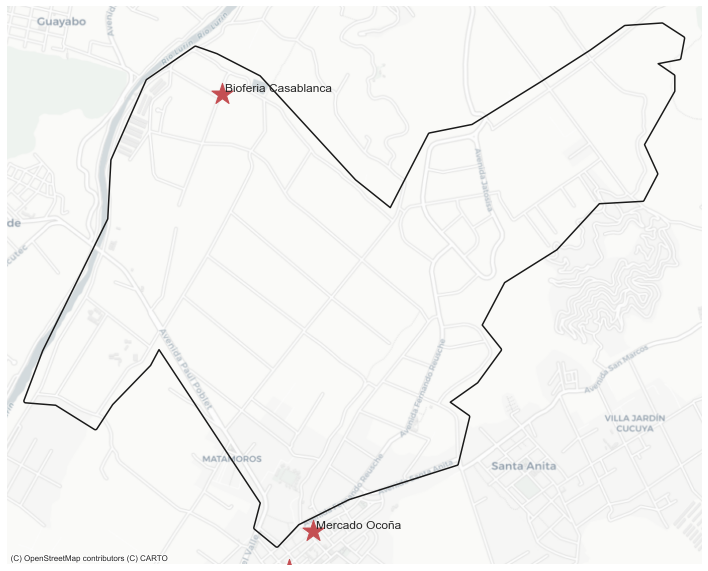

In [84]:
ax = gpd.GeoSeries((urba_pachacamac.geometry
                   .unary_union
                   .buffer(0.0001) # Smooth borders
                   .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

pachacamac_markets.plot(color='r', marker='*', markersize=500, ax=ax)

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = urba_pachacamac.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/zona_pachacamac_urbanizacion.png', 
            dpi=300, bbox_inches='tight')

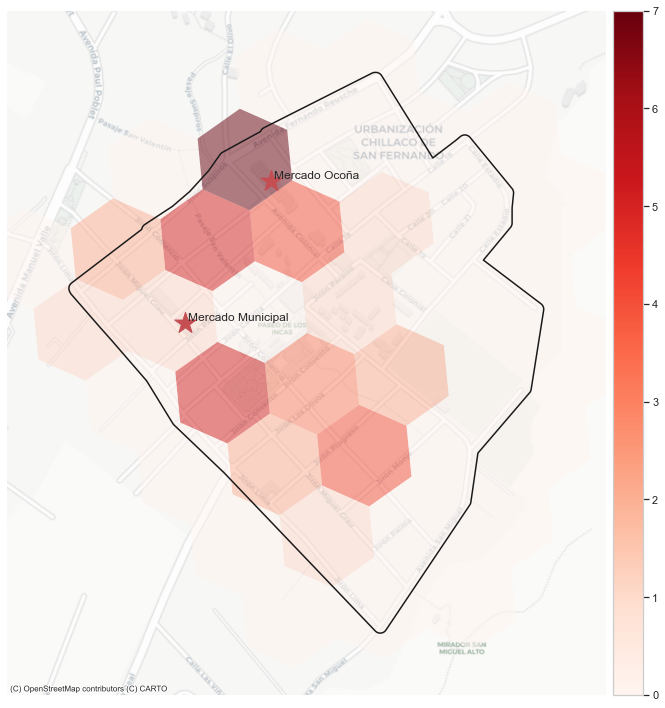

In [80]:
ax = gpd.GeoSeries((zona_pachacamac.geometry
                    .unary_union
                    .buffer(0.0001) # Smooth borders
                    .exterior)).plot(facecolor='none', color='k', figsize=(10,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

pachacamac_hexs_counts.plot('Distrito', legend=True, linewidth=0, cmap='Reds', alpha=0.5, ax=ax, cax=cax)

pachacamac_markets.plot(color='r', marker='*', markersize=500, ax=ax)

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = zona_pachacamac.total_bounds
margins = 0.001
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

plt.tight_layout()
plt.savefig('outputs/producto_1/maps/tipo_oferta_hexmap_pachacamac.png', 
            dpi=300, bbox_inches='tight')